<div class="alert alert-block alert-success">
    <h1>DataLab HvA - serie Machine Learning Python - Tech report 2</h1>
</div>

<div class="alert alert-block alert-warning">
    <h2>Datapreparatie</h2>
</div>

### 0. Doel van deze les
In dit Tech Report gaan we in op het proces om een dataset gereed te maken voor de vervolgstappen in het Machine Learning proces

In deze serie wordt dit T.R. opgevolgd door *Tech Report 3: Performance metrics regressie en classificatie*, we raden je aan ook deze door te werken voordat je werkelijk start met modelleren.

**Je leert** 
- Hoe je een dataset kunt inspecteren op missende waarden
- hoe je de dataset kunt splitsen in een test- en trainset voor verder gebruik in jouw project  
- Hoe je de gesplitste onderdelen van de dataset kunt opslaan om in het vervolgproces van Machine Learning te (her)gebruiken

**Je leert niet:**
- Heel diep in te gaan op diverse methoden om het probleem van missende data in een dataset op te lossen  

### 1. Laden van de benodigde packages
Packages die je zelf nog niet hebt geinstalleerd dien je vooraf in Python te installeren.

In [1]:
# Voor de afbeeldingen en de datsasets
import matplotlib.pyplot as plt
import seaborn as sns

# Voor het bewerken en inspecteren van de data
import pandas as pd

### 2. Missende data
Het komt regelmatig voor dat er data ontbreekt in de dataset waarmee je werkt, daarvoor kun je verschillende oorzaken bedenken:  

- een meting kon niet worden uitgevoerd  
- er is een fout gemaakt tijdens het veldwerk waarin de data verzameld is  
- een waarde van een bepaalde variabele is niet van toepassing voor een bepaalde meting  

In het algemeen kunnen Machine Learning modellen niet (of slecht) omgaan met variabelen die geen waarde hebben. We illustreren methoden om verkenningen te doen met betrekking tot de aanwezigheid en ligging van missende waarden in de dataset aan de hand van de dataset *titanic*. 

In [2]:
#### Laden van de voorbeeld dataset en enkele eerste inspecties

In [3]:
# Laden van een standaard dataset uit package seaborn 
data = sns.load_dataset('titanic')
print("Eerste 5 rijen data \n", data.head())
print("\n De shape van het data frame: \n (#waarnemingen, #variabelen) = ", data.shape)

Eerste 5 rijen data 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

 De shape van het data frame: 
 (#waarnemingen, #variabelen) =  (891, 15)


#### Inspectie missende waarden per kolom

In [4]:
print(" \nTelling van aantal NaN in iedere kolom van het DataFrame : \n\n",
      data.isnull().sum())

 
Telling van aantal NaN in iedere kolom van het DataFrame : 

 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Blijkbaar zijn er in de variabele `deck` 688 waarden niet bekend, voor `age` 177 en voor `embarked` en `embark_town` beiden 2. 

#### Inspectie missende waarden hele dataset

In [5]:
print(" \nTelling van aantal NaN in het hele DataFrame : \n\n",
       data.isnull().sum().sum())

 
Telling van aantal NaN in het hele DataFrame : 

 869


#### Visualisatie missende waarden
Zeker niet uitputtend qua voorbeelden hier gepresenteerd, maar in veel gevallen geeft een visueel overzicht van de missende waarden tegen de achtergrond van de gehele set een richting aan van een oplossing om dit in datapreparatie op te gaan lossen.

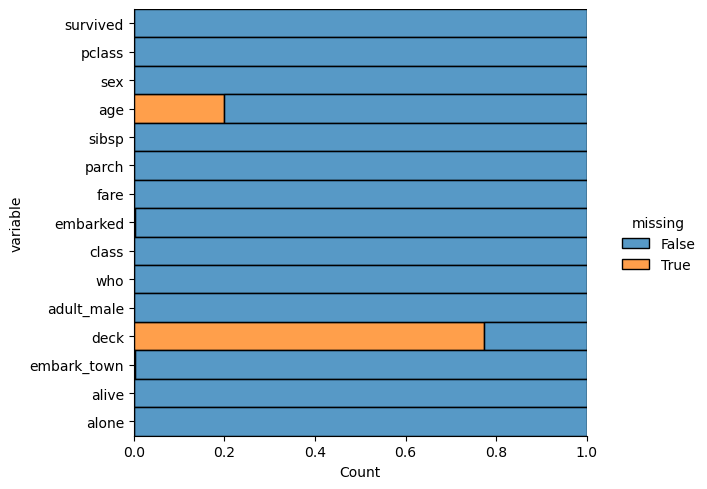

In [6]:
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show()


#### Mogelijke preparatie stappen missende waarden
De volgende mutaties van de data kunnen in overweging worden genomen bij het preparaeren van de data voor modellering. De lijst is niet uitputtend.  

- Verwijder waarnemingen met missende data  
    - nadeel: je raakt (veel) data kwijt  
- Vervang missende waarden door een gemiddelde / modus van de variabele in kwestie  
    - nadeel: de waarden staan los van de overige variabelen (houden bijvooorbeeld geen rekening met de correlatie met de overige niet-missende waarden van de waarneming  
- Vervang missende waarden door een *voorspelling* van de de waarde o.b.v. de overige variabelen van de waarneming  
    - nadeel: het is bewerkelijk, voor elke variabele dient een model te worden gefit. Het blijft uiteraard een geschatte waarde!
    
Lees [hier](https://scikit-learn.org/stable/modules/impute.html) meer over de opties via package `sklearn`.


#### Toepassing op dit voorbeeld
Vanuit bovenstaande onderzoek zou het bijvoorbeeld te onderbouwen zijn om:  

- De variabele `deck` te verwijderen  
    - Let op: het model dat op basis van deze set zal worden getraind rekent dan ook *niet* meer op een variabele `deck`  
- De variabele `age` te vervangen door het gemiddelde van de waarde van de variabele
- De waarnemingen waar waarden missen voor `embark_town` en `embarked` te verwijderen




In [7]:
#De variabele deck verwijderen
data.drop('deck',axis=1, inplace=True)

#Resultaat: geen 'deck' meer:
print("Eerste 5 rijen data \n", data.head())


Eerste 5 rijen data 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


In [9]:
# De variabele age vervangen ...
# scikit-learn heeft packages om dit voor ons te doen
from sklearn.impute import SimpleImputer # (gemiddelde, modus) 
import numpy as np

#...door het gemiddelde ...
imp = SimpleImputer(missing_values=np.nan, strategy='mean') #strategy="most_frequent" werkt bijv. voor dtype="category" 
imp.fit(data[['age']])
data[['age']] = imp.transform(data[['age']])

In [10]:
# De waarnemingen waar waarden missen voor embark_town en embarked verwijderen
data = data[data['embark_town'].notna()]
data = data[data['embarked'].notna()]

#Resultaat:
print(" \nTelling van aantal NaN in iedere kolom van het DataFrame : \n\n",
      data.isnull().sum())

 
Telling van aantal NaN in iedere kolom van het DataFrame : 

 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


#### inspectie data 'tips' uit Tech Report 1
We vervolgen de serie voornamelijk met de dataset `tips` die al werd geïntroduceerd in *Tech Report 1 - Introductie Machine Learning*. 
We zien in de output van de code hieronder dat er géén missende waarden zijn.

In [11]:
# Laden van een standaard dataset 'tips' uit package seaborn 
data = sns.load_dataset('tips')

#Missende waarden tellen
print(" \nTelling van aantal NaN in iedere kolom van het DataFrame : \n\n",
      data.isnull().sum())

 
Telling van aantal NaN in iedere kolom van het DataFrame : 

 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### 3. Split data in test en train
Dit is een onderdeel van fase Data Preparation 

In het voorbeeld hieronder kiezen we voor 
- een verhouden train - test van 70% - 30%. Andere keuzen kunnen ook!
- het gebruik van `random_state`: een vaste waarde garandeert dat de split, en daarmee ook de modellen, steeds reproduceerbaar blijft, andere splits zullen namelijk ook altijd tot (net iets) andere modellen leiden! De waarde `2023` kan ook anders gekozen worden.

In [12]:
# Voor het afsplitsen van een train- en test dataset
from sklearn.model_selection import train_test_split

# Split in training en test data 
data_train, data_test = train_test_split(data, test_size = 0.3, random_state=2023)

#### Opslaan van de test- train data
Het wordt aanbevolen de data uit deze split op te slaan. Bij de fase Modelleren importeren we de data dan steeds opnieuw.

In [13]:
# Sla train/test sets op, deel deze met eventuele projectgenoten
data_train.to_csv('data_train.csv', sep=';', decimal=',')
data_test.to_csv('data_test.csv', sep=';', decimal=',')

#### Gebruik test- en train data
Zie ook de beschrijving van CRISP-DM in *Tech Report 1 - Introductie Machine Learning*. Van belang is in de fase van het modelleren en het evalueren dat voor álle modellen:  

- in de traingsfase *alleen* gewerkt wordt met de traindata, blijf van de testdata af  
- het duo 'train- en test data' voor alle modellen *gelijk* is (anders onderling geen vergelijk mogelijk)   
- de evaluatie van het model wordt uitgevoerd op de testdata, daarna mag niet *niet* meer terug naar de fase van modelleren, immers: dan zou je informatie van de testset gebruiken in het creëren van het model en is het *geen nieuwe data meer* voor het model.

Suggestie voor vervolg: *Tech Report 3: Prestatiematen modelscore*

### 4. Standaardisatie van de data
Er zijn algoritmen die gevoelig zijn voor de schaal waarop de numerieke voorspellende variabelen (de *X-data*) worden aangeboden. Voorbeelden zijn *Neurale Netwerken*, *Support Vector Machines*, maar er zijn er meer. Als je bij het trainen bijvoorbeeld voor een variabele *centimeters* (of *inches*) in plaats van *meters* gebruikt als lengtemaat, beïnvloedt dit de kwaliteit van het eindmodel. Ook de keuze van de valuta, temperatuurschaal etc zou dan van invloed zijn. 

Om iedere numerieke variabele in zowel *ligging* als *variantie* gelijk te schalen (dus ook van even grote invloed te laten zijn) is het gebruikelijk de *X-data* die numeriek is te herschalen zodanig dat:  

- het *gemiddelde* van de **train data** voor iedere afzonderlijke numerieke verklarende variabele `0` is 
- de *variantie* van de **train data** voor iedere afzonderlijke numerieke verklarende variabele `1` is 

Dit wordt *standaardisatie* (of ook wel *normalisatie*) van de data genoemd.

Scikit Learn ondersteunt dit met een standaard methode, we illustreren dit op de dataset `california_housing` (voor meer info over de data, zie [deze](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) site.) 

In [1]:
# Voor de dataset en plots
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Voor het bewerken en inspecteren van de data
import pandas as pd

# Laden van een standaard dataset uit package scikit learn
housing = datasets.fetch_california_housing()

X = pd.DataFrame(housing.data, columns = housing.feature_names)
# y = pd.Series(housing.target) nu niet van belnag in dit voorbeeld
print(X.head())
print(X.shape)
print(X.dtypes)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
(20640, 8)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


We zien dat de voorspellende variabelen in de data allen numeriek zijn, maar met een heel verschillende ligging en bereik:

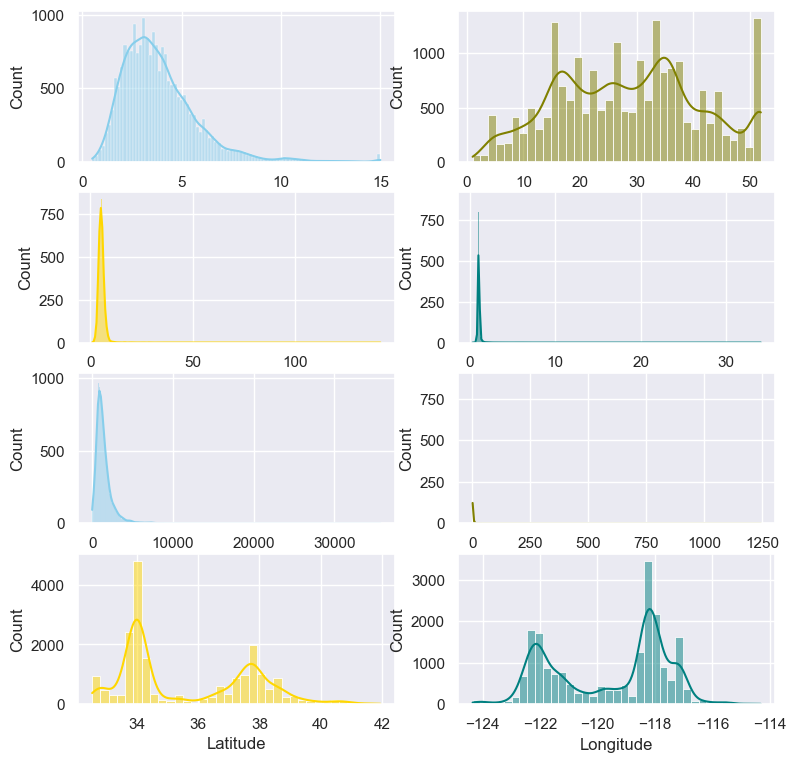

In [2]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = X

fig, axs = plt.subplots(4, 2, figsize=(9, 9))

sns.histplot(data=df, x="MedInc", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="HouseAge", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="AveRooms", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="AveBedrms", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Population", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="AveOccup", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="Latitude", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="Longitude", kde=True, color="teal", ax=axs[3, 1])

plt.show()

#### Statndaardiseren van de data o.b.v. de train dataset
Hieronder standaardiseren we de data. 

Let op: de `scaler` is gebaseerd op de **trainddata**! (die heet nu `X`). **Zodra je een model gaat fitten op de herschaalde data dien je óók de test-data te herschalen met precies deze `scaler`!! Je gebruikt dus alléén gegevens uit de train-data daarvoor.**

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X) # X is altijd de traindataset! 
X_scaled = pd.DataFrame(scaler.transform(X), columns = housing.feature_names) #Deze scaler pas je later ook toe op de test daatset

In [4]:
print(X_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


Opnieuw plotten:

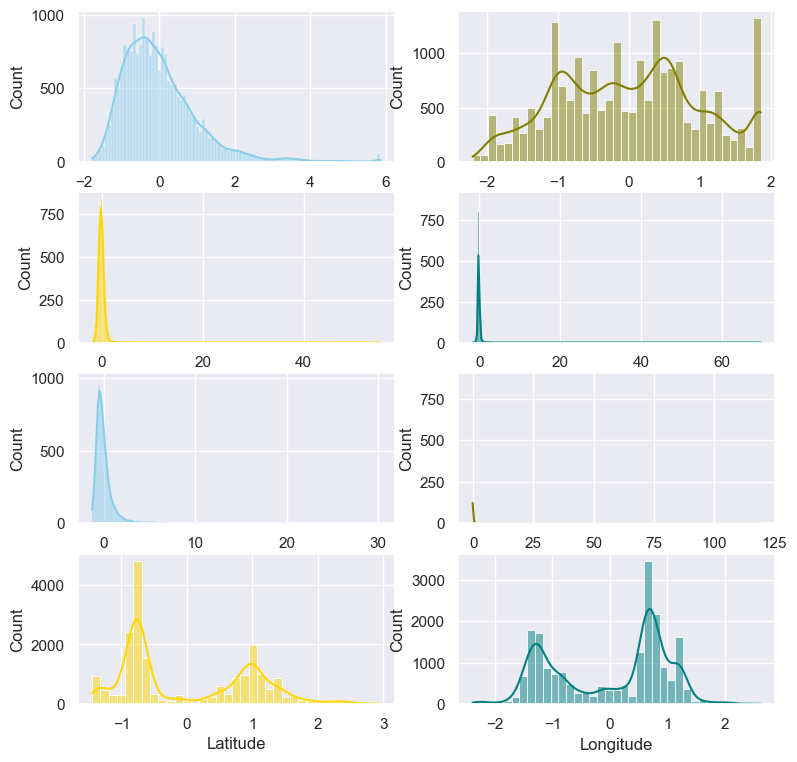

In [5]:
df = X_scaled

fig, axs = plt.subplots(4, 2, figsize=(9, 9))

sns.histplot(data=df, x="MedInc", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="HouseAge", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="AveRooms", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="AveBedrms", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Population", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="AveOccup", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="Latitude", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="Longitude", kde=True, color="teal", ax=axs[3, 1])

plt.show()

Het bereik en de ligging zijn duidelijk gewijzigd. 